In [1]:
# cifar-10 모델 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 크기 확인
print(f"훈련 데이터: {x_train.shape}, 레이블: {y_train.shape}")
print(f"테스트 데이터: {x_test.shape}, 레이블: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
훈련 데이터: (50000, 32, 32, 3), 레이블: (50000, 1)
테스트 데이터: (10000, 32, 32, 3), 레이블: (10000, 1)


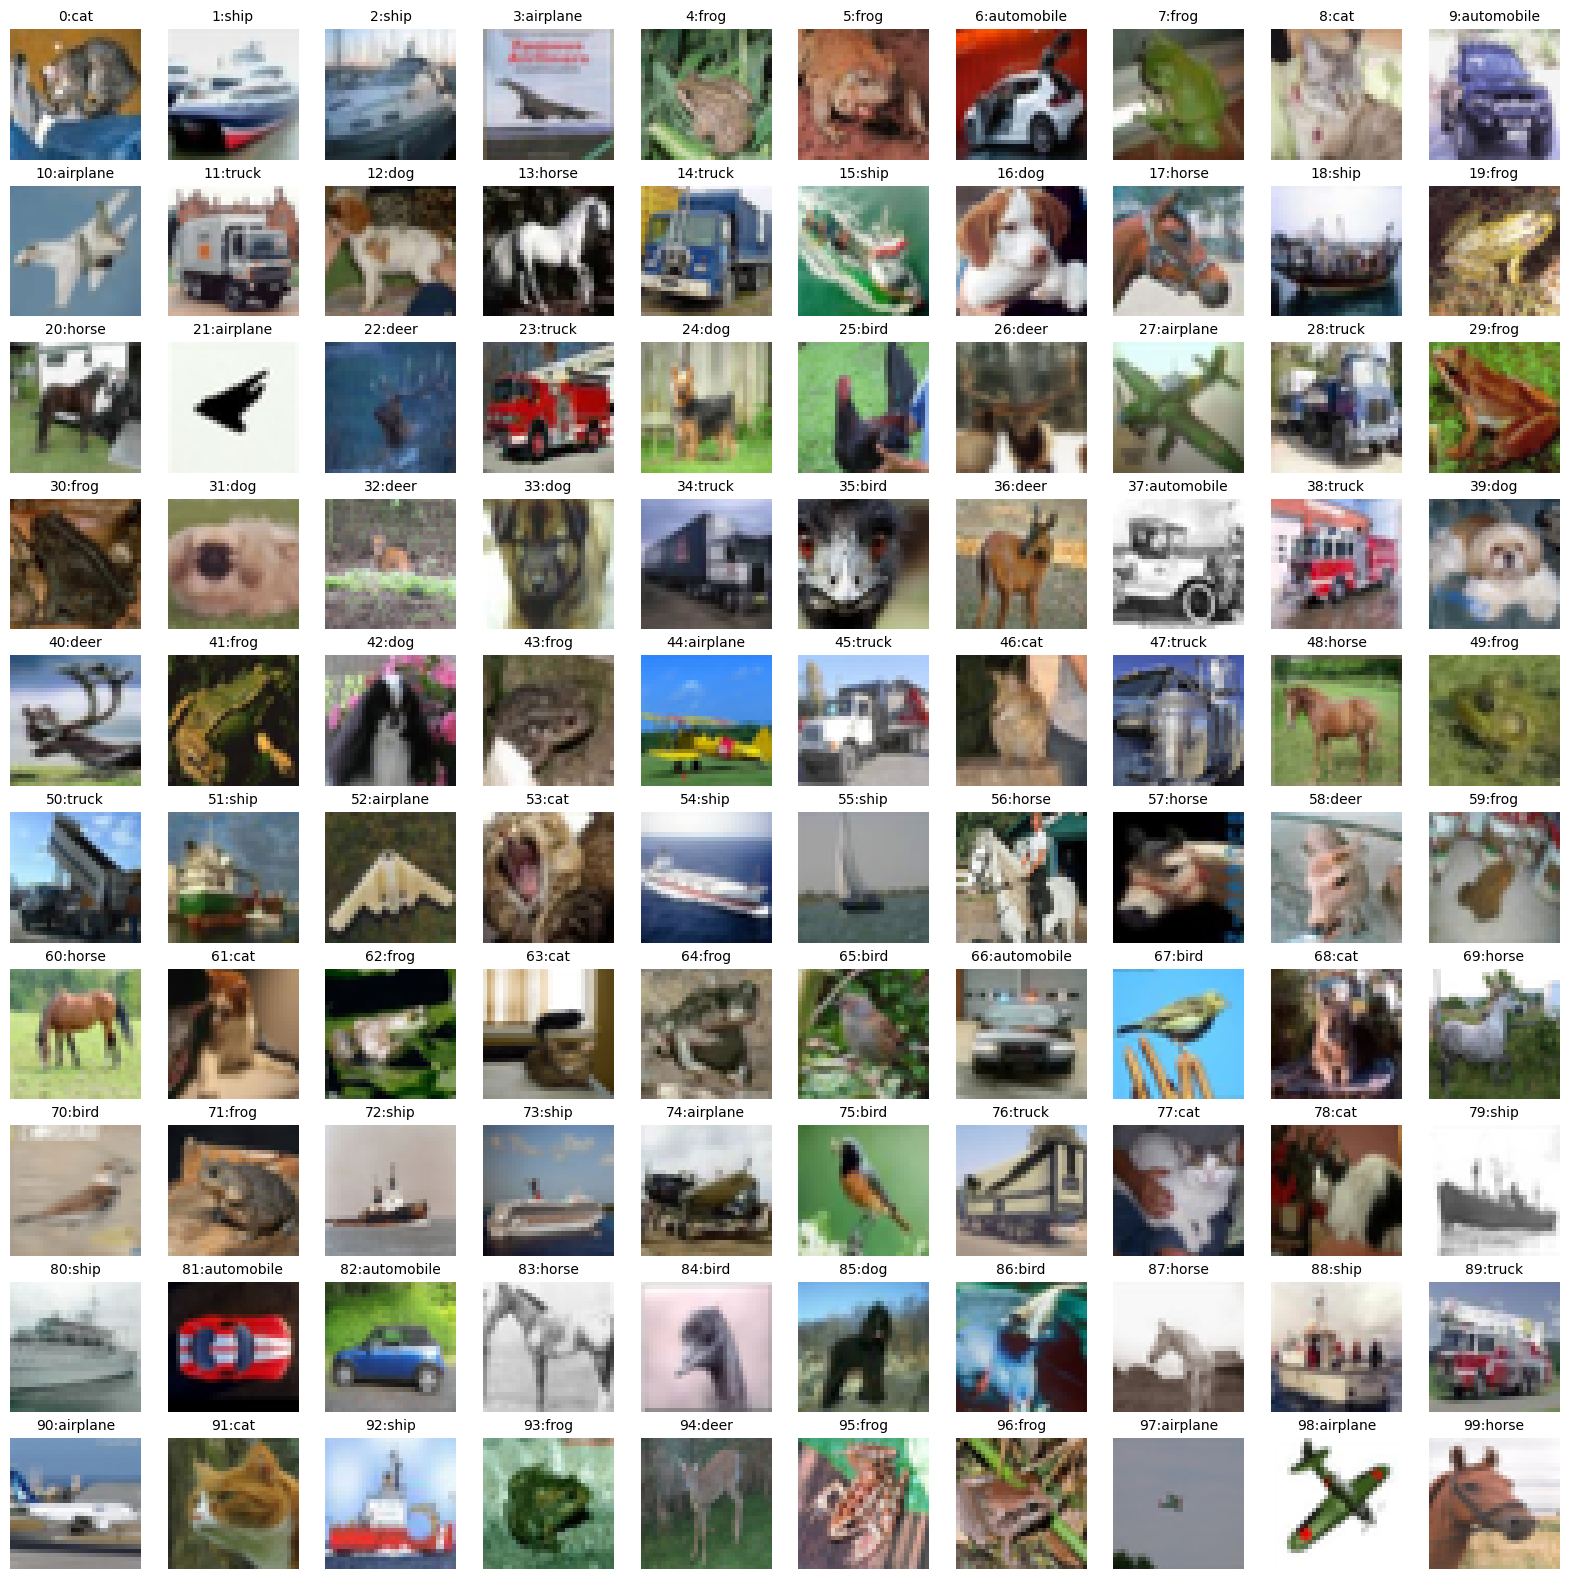

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# CIFAR-10 클래스 정의
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_images(start_idx=0, num_images=100):
    plt.figure(figsize=(20, 20))

    for i in range(num_images):
        idx = start_idx + i
        if idx >= len(x_train):  # 인덱스 초과 방지
            break

        plt.subplot(10, 10, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f"{idx}:{classes[y_test[idx][0]]}", fontsize=10)
        plt.axis("off")

    plt.show()

# 처음 100개 이미지 출력
show_images(0)


Text(0.5, 1.0, '5468:dog')

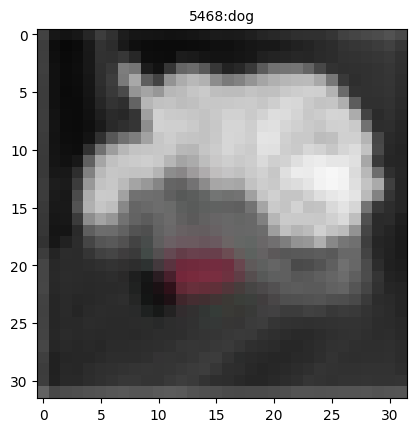

In [86]:
# https://labelerrors.com/에서 clean data보고 수정하기
insert = 5468

plt.imshow(x_test[insert])
plt.title(f"{insert}:{classes[y_test[insert][0]]}", fontsize=10)

In [45]:
# classes = ["0:airplane", "1:automobile", "2:bird", "3:cat", "4:deer", "5:dog", "6:frog", "7:horse", "8:ship", "9:truck"]


In [87]:
y_test[insert] = np.array([3], dtype=np.uint8)

array([[[222, 224, 223],
        [223, 225, 224],
        [225, 227, 226],
        ...,
        [213, 220, 226],
        [206, 215, 223],
        [197, 208, 217]],

       [[230, 232, 231],
        [229, 231, 230],
        [227, 229, 228],
        ...,
        [217, 223, 227],
        [211, 218, 224],
        [204, 213, 220]],

       [[227, 230, 228],
        [228, 230, 229],
        [221, 223, 222],
        ...,
        [222, 225, 228],
        [218, 222, 226],
        [211, 217, 222]],

       ...,

       [[ 97,  98, 111],
        [109, 109, 123],
        [ 81,  81,  95],
        ...,
        [158, 152, 148],
        [208, 204, 198],
        [181, 179, 170]],

       [[ 71,  64,  81],
        [ 79,  72,  89],
        [ 75,  67,  85],
        ...,
        [154, 149, 150],
        [209, 205, 201],
        [177, 176, 169]],

       [[ 87,  81,  92],
        [103,  97, 108],
        [117, 111, 122],
        ...,
        [153, 150, 152],
        [204, 203, 194],
        [183, 182, 173]]], dtype=uint8)
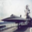

In [38]:
x_test[insert]

In [39]:
y_test[insert]

array([8], dtype=uint8)

In [88]:
#모델 설계하기(Sequential)

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='valid', input_shape=(32,32,3)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),padding='valid'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# #모델 설계하기2(API함수형)

# from tensorflow import keras
# from tensorflow.keras import layers


# inputs = keras.Input(shape = (32,32,3))
# x = layers.Conv2D(32,(3,3),padding='valid')(inputs)
# x = layers.AveragePooling2D((2,2,))(x)
# x = layers.BatchNormalization()(x)
# x = layers.Conv2D(64, (3,3), padding='valid')(x)
# x = layers.AveragePooling2D((2,2))(x)
# x = layers.BatchNormalization()(x)
# x = layers.Flatten()(x)
# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(10, activation='softmax')(x)


# model = keras.Model(inputs,x)

# model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_12                 │ (None, 15, 15, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_13                 │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

### 기존의 데이터셋으 돌렸을때

In [ ]:
# 기존의 모델로 돌렸을때
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 154ms/step - accuracy: 0.2855 - loss: 2.4520 - val_accuracy: 0.4125 - val_loss: 1.7619
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.4086 - loss: 1.7061 - val_accuracy: 0.4698 - val_loss: 1.5528
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 153ms/step - accuracy: 0.4568 - loss: 1.5729 - val_accuracy: 0.4522 - val_loss: 1.6289
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 150ms/step - accuracy: 0.4735 - loss: 1.5087 - val_accuracy: 0.4988 - val_loss: 1.4548
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.4832 - loss: 1.4792 - val_accuracy: 0.5120 - val_loss: 1.4239
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.4962 - loss: 1.4350 - val_accuracy: 0.5242 - val_loss: 1.4010
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 144ms/step - accuracy: 0.5068 - loss: 1.4062 - val_accuracy: 0.5173 - val_loss: 1.4059
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.5218 - loss: 1

### y_test라벨 정제후

In [89]:
#test셋 데이터 정제후
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.2854 - loss: 2.4647 - val_accuracy: 0.4277 - val_loss: 1.6657
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4150 - loss: 1.6966 - val_accuracy: 0.4579 - val_loss: 1.5637
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4523 - loss: 1.5755 - val_accuracy: 0.4652 - val_loss: 1.5693
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4701 - loss: 1.5111 - val_accuracy: 0.4850 - val_loss: 1.4920
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4942 - loss: 1.4693 - val_accuracy: 0.4723 - val_loss: 1.5333
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4949 - loss: 1.4462 - val_accuracy: 0.4995 - val_loss: 1.4930
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5066 - loss: 1.4086 - val_accuracy: 0.5196 - val_loss: 1.4166
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5171 - loss: 1.3924 - val_accuracy: 

In [90]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.5311 - loss: 1.3764
✅ Test Accuracy: 0.5311


In [91]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [92]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def model_builder(hp):
    model = models.Sequential()

    # 첫 번째 Conv2D 레이어: 하이퍼파라미터로 필터 수, 커널 크기, 활성화 함수 선택
    model.add(layers.Conv2D(
        hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),  # 필터 수
        (3, 3),
        padding='valid',
        activation='relu',
        input_shape=(32, 32, 3)
    ))

    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # 두 번째 Conv2D 레이어
    model.add(layers.Conv2D(
        hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),  # 필터 수
        (3, 3),
        padding='valid',
        activation='relu'
    ))

    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())
    model.add(layers.Dense(
        hp.Int('dense_units', min_value=128, max_value=512, step=128),  # Dense 유닛 수
        activation='relu'
    ))

    # Dropout 비율도 하이퍼파라미터로 설정
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # 출력층
    model.add(layers.Dense(10, activation='softmax'))

    # 컴파일
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),  # 옵티마이저
        loss='sparse_categorical_crossentropy',  # 정수형 레이블을 사용할 경우
        metrics=['accuracy']
    )

    return model


In [93]:
# KerasTuner에서 하이퍼파라미터 튜닝 진행
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',  # 검증 정확도를 목표로
    max_epochs=10,  # 최대 epoch 수
    factor=3,  # 학습을 진행할 때마다 실험 수를 줄이는 비율
    directory='my_dir',  # 결과가 저장될 디렉토리
    project_name='cifar10_tuning'  # 프로젝트 이름
)

# 튜닝 시작 (여기서 x_train, y_train은 CIFAR-10 데이터셋)
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Trial 30 Complete [00h 01m 44s]
val_accuracy: 0.7174000144004822

Best val_accuracy So Far: 0.7462000250816345
Total elapsed time: 00h 23m 14s


In [94]:
# 최적의 모델을 찾고 학습
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8919 - loss: 0.3158 - val_accuracy: 0.7466 - val_loss: 0.9948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9066 - loss: 0.2709 - val_accuracy: 0.7231 - val_loss: 1.0936
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9144 - loss: 0.2536 - val_accuracy: 0.7533 - val_loss: 0.9941
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9205 - loss: 0.2288 - val_accuracy: 0.7437 - val_loss: 1.0934
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9289 - loss: 0.2080 - val_accuracy: 0.7397 - val_loss: 1.1968
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9311 - loss: 0.2046 - val_accuracy: 0.7573 - val_loss: 1.0618
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9361 - loss: 0.1899 - val_accuracy: 0.7595 - val_loss: 1.0974
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9388 - loss: 0.178

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=cifar10_model.

In [110]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,836,896 (7.01 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 1,224,470 (4.67 MB)

In [109]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 192)         │         110,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 192)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 192)           │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6912)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,769,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,656,672 (21.58 MB)

 Trainable params: 1,885,386 (7.19 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 3,770,774 (14.38 MB)

In [106]:
# 모델 저장 (SavedModel 형식)
import tensorflow as tf
# SavedModel 형식으로 저장 (그냥 경로만 지정)
# best_model.save('cifar10_model')
best_model.save('cifar10_model.keras')  # ✅ 최신 Keras 저장 방식
# best_model.save('cifar10_model', save_format='tf')  # ✅ SavedModel 형식


In [112]:
# 모델 로드
loaded_model = keras.models.load_model('cifar10_model.keras')

# 모델 평가
loaded_model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7548 - loss: 1.2322


[1.2591584920883179, 0.7494999766349792]

In [113]:
import tensorflow as tf
import keras

# 모델 로드
loaded_model = keras.models.load_model('cifar10_model.keras')

# TFLite 변환
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)  # ✅ loaded_model 사용
tflite_model = converter.convert()

# 변환된 모델 저장
with open('cifar10_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite 변환 완료: cifar10_model.tflite")


Saved artifact at '/tmp/tmp6w46wxgo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132900359503504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359501392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359501968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359501776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359503696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359498128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359498320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359502736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359982544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359982928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900359979856:

## flutter에 연결을 위해서 더 경량화 시키기

In [114]:
import tensorflow as tf
import keras

# 모델 로드
loaded_model = keras.models.load_model('cifar10_model.keras')

# TFLite 변환기 설정 (최적화 포함)
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

# ✅ INT8 양자화 (속도 & 크기 최적화)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 변환 수행
tflite_model = converter.convert()

# 변환된 모델 저장
with open('cifar10_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ 최적화된 TFLite 변환 완료: cifar10_model.tflite")


Saved artifact at '/tmp/tmp8qral3bj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132900356233488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356239248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356238480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356238288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356233296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356239440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356236752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356236176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356237136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900356237904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132900362603408: